# GG4527- Urban Analytics: A Toolkit for Sustainable Urban Development Assignment 2
## Lab 6: Geodemographics

-----


### Challenge 1

The main aim of this challenge is to use geodemographic classification to help  retail business on where the best location for a store is within the city of Edinburgh. This is done by using the output areas to understand certain neighbourhoods within the city that will reflect a certain lifestyle and therefore shopping habbits in the city. By doing this there will be greater understanding of these differences which can help retailers and planners make more informed decisions about where to locate services such as supermarkets, cafés, gyms, or retail outlets. For example, areas with a high proportion of young adults may respond well to cafés and gyms, while more suburban families or older populations might indicate a potential for supermarkets or convenience retail. Through clustering analysis, this project aims to group similar areas based on key indicators like age, economic activity, health, and education. This level of understanding will not only benefit the retail industry but will also will also have wider benefits that could include wider applications for public transport infrastructure and the city planning on a whole. 

In [ ]:
# Prepping data

import pandas as pd
import os

csv_directory = "/Users/Lynsey/Documents/UA_GG4257/UA Repo/Week_6/data"  # reading file 
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

merged_data = pd.DataFrame() # create data frame

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) 
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset
merged_data.to_csv("/Users/Lynsey/Documents/UA_GG4257/UA_Assignment_2/merged_census_data.csv", index=False)


In [ ]:
import geopandas as gpd

oa_shapefile = gpd.read_file("/Users/Lynsey/Documents/UA_GG4257/UA_Assignment_2/OutputArea2011_MHW.shp")

# reading the oa of scotland that can then be filtered down to edi (National Records of Scotland, 2024)

In [ ]:
print(oa_shapefile.columns)
oa_shapefile.head()

# the coucil code for edi is S12000036
# as confirmed by (Scotland's National Statistics, n.d.)

In [ ]:
edinburgh_oa = oa_shapefile[oa_shapefile["council"] == "S12000036"]


In [ ]:
print(edinburgh_oa.columns)
print(merged_data.columns)

# shows that oa code is under different names 

In [ ]:
edinburgh_oa = edinburgh_oa.rename(columns={"code": "oa_code"}) # renaming the oa codes to the same name to allow merge

edi_merg = edinburgh_oa.merge(merged_data, on="oa_code")

In [ ]:
print(merged_data.columns[merged_data.columns.duplicated()]) # shows duplicates

In [ ]:
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()] # removing duplicates for merge


In [ ]:
print(merged_data.columns[merged_data.columns.duplicated()])  # should be empty


In [ ]:
edi_merg = edinburgh_oa.merge(merged_data, on="oa_code") # try merging again

# data is preped and ready to go

In [ ]:
edi_merg.head()

## DEA

The areas that I am going to explore is age, employment, health, housing and mobility. These variables were chosen as the contrasting values across each variable spectrum are likely to indicate distinct lifestyles, which in turn shape different retail behaviours and preferences. For example, the spending habbits of 20-24 year olds is significantly different to the spending habbits of 75-84 year olds. In addition, employment levels show areas that have greater spending power and areas that are more deprived which will highlight areas of disposable income and consumer patterns. Household type and health status were selected to better understand lifestyle profiles, which are often used in market segmentation.


In [ ]:
list(edi_merg.columns)


In [ ]:
# summary statistics
edi_merg['20 to 24'].describe()

In [ ]:
edi_merg['75 to 84'].describe()

In [ ]:
edi_merg['Economically active: Employee: Full-time'].describe()

In [ ]:
edi_merg['Economically active: Unemployed'].describe()

In [ ]:
edi_merg['Very bad health'].describe()

In [ ]:
edi_merg['Very good health'].describe()

In [ ]:
edi_merg['All people aged 16 and over: No qualifications'].describe()

In [ ]:
edi_merg['One family only: Married or same-sex civil partnership couple: No children'].describe()

In [ ]:
# violin plots

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['20 to 24',
                      '75 to 84',
                      'Economically active: Employee: Full-time',
                      'Economically active: Unemployed',
                      'Very bad health',
                      'Very good health',
                      'All people aged 16 and over: No qualifications',
                      'One family only: Married or same-sex civil partnership couple: No children']

plt.figure(figsize=(10, 17))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

screenshots

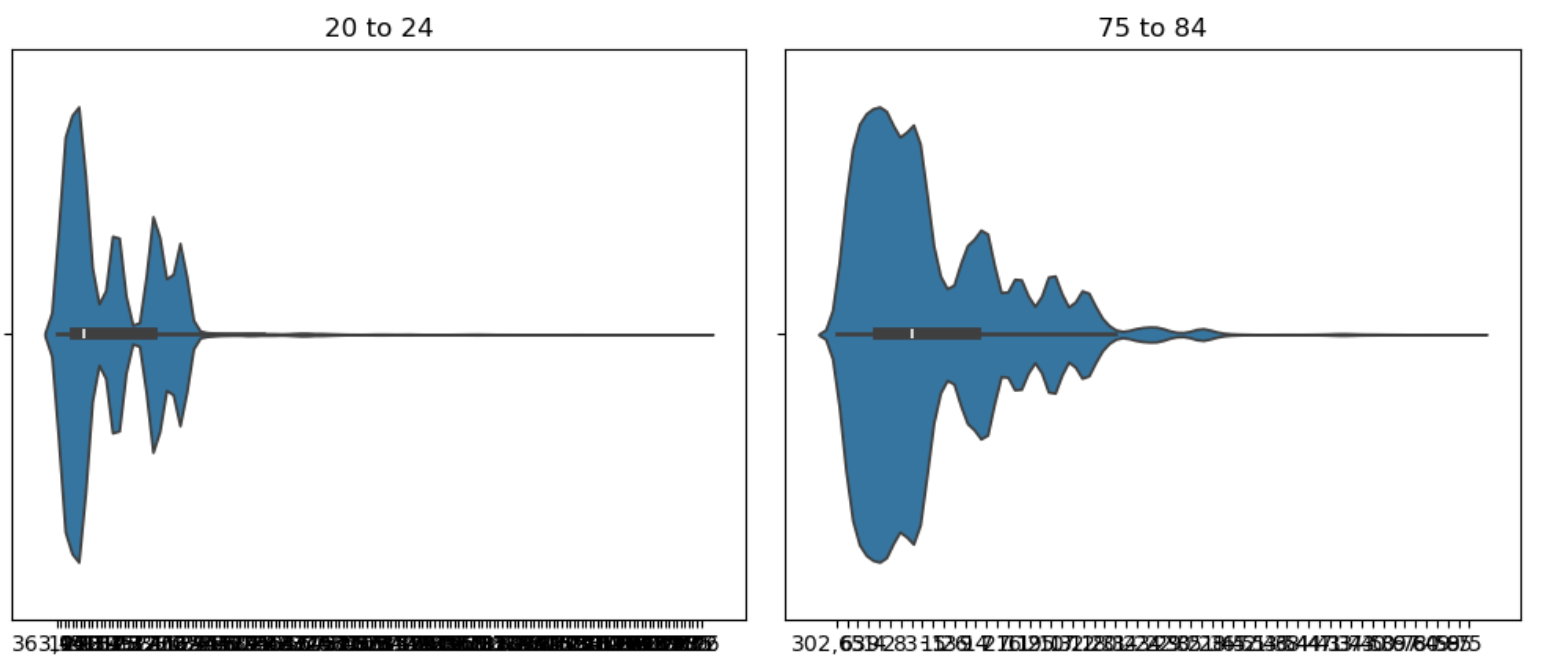
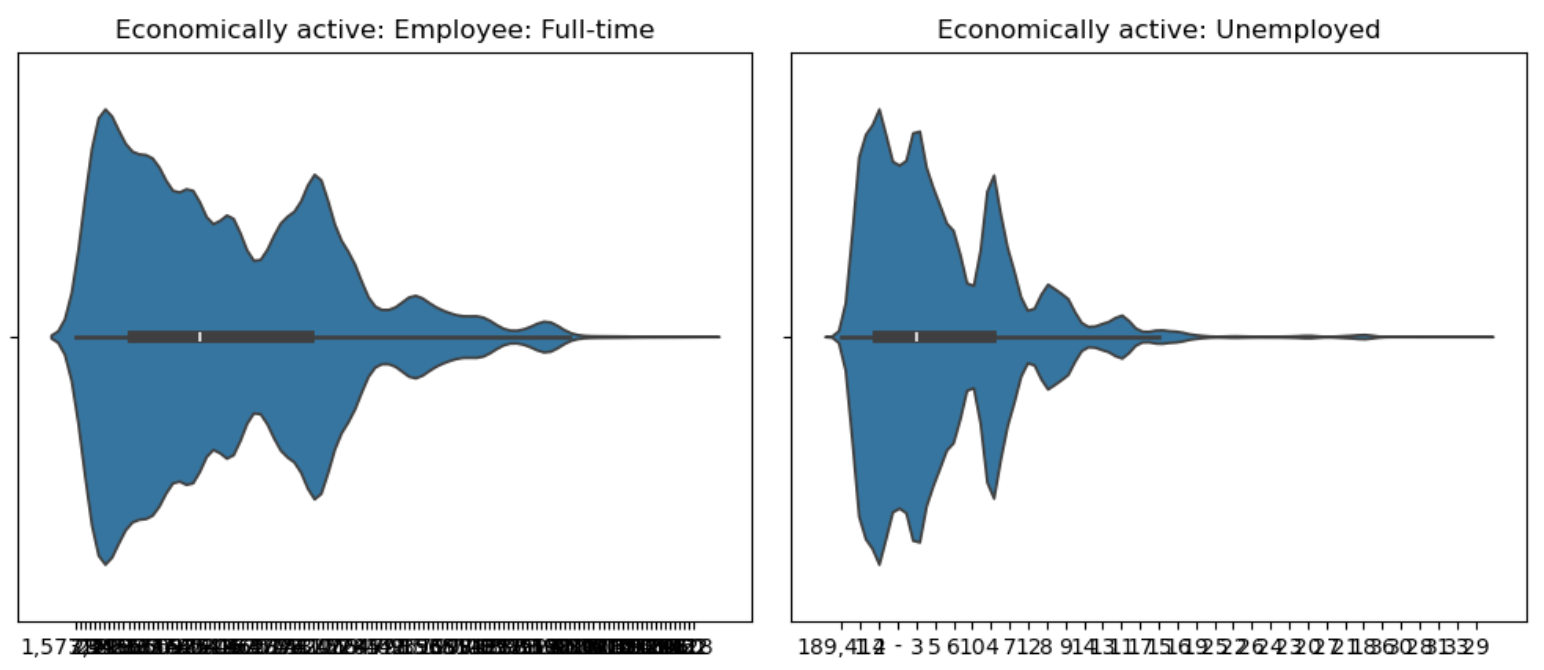
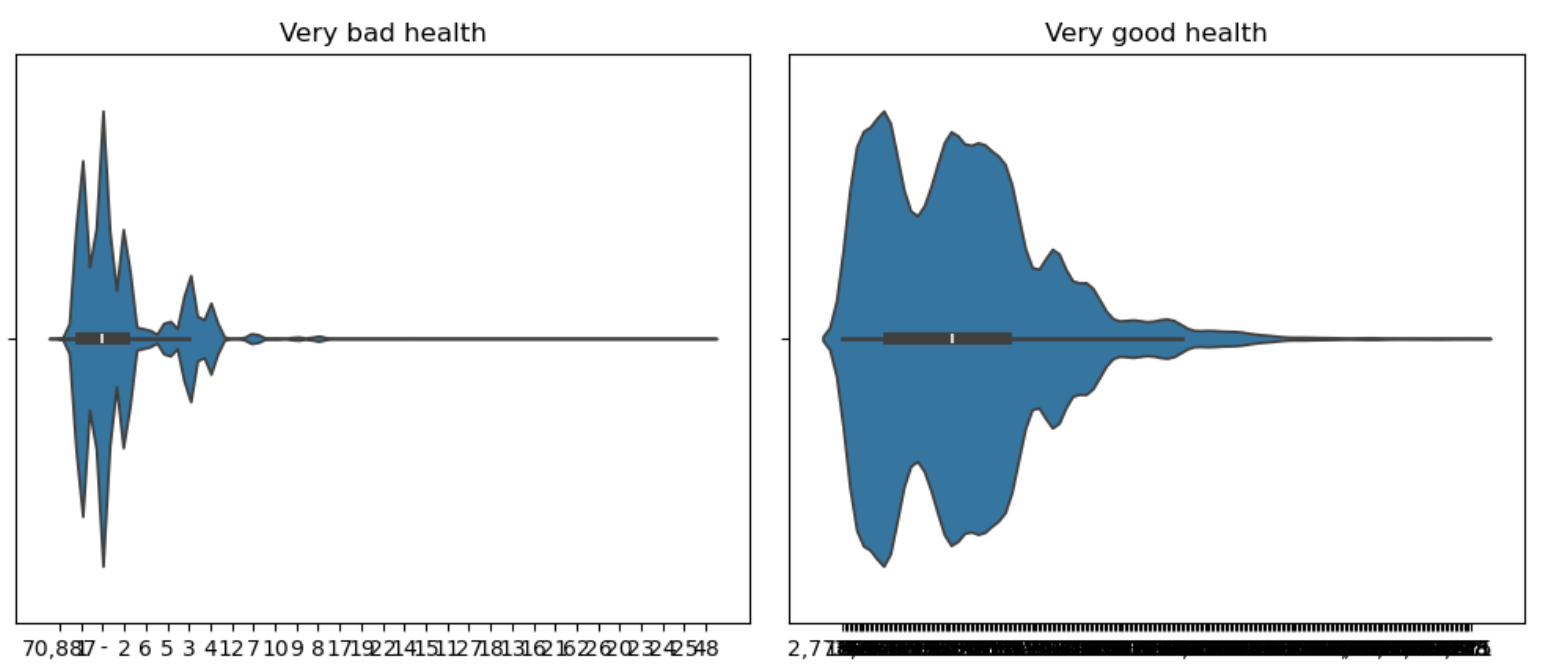
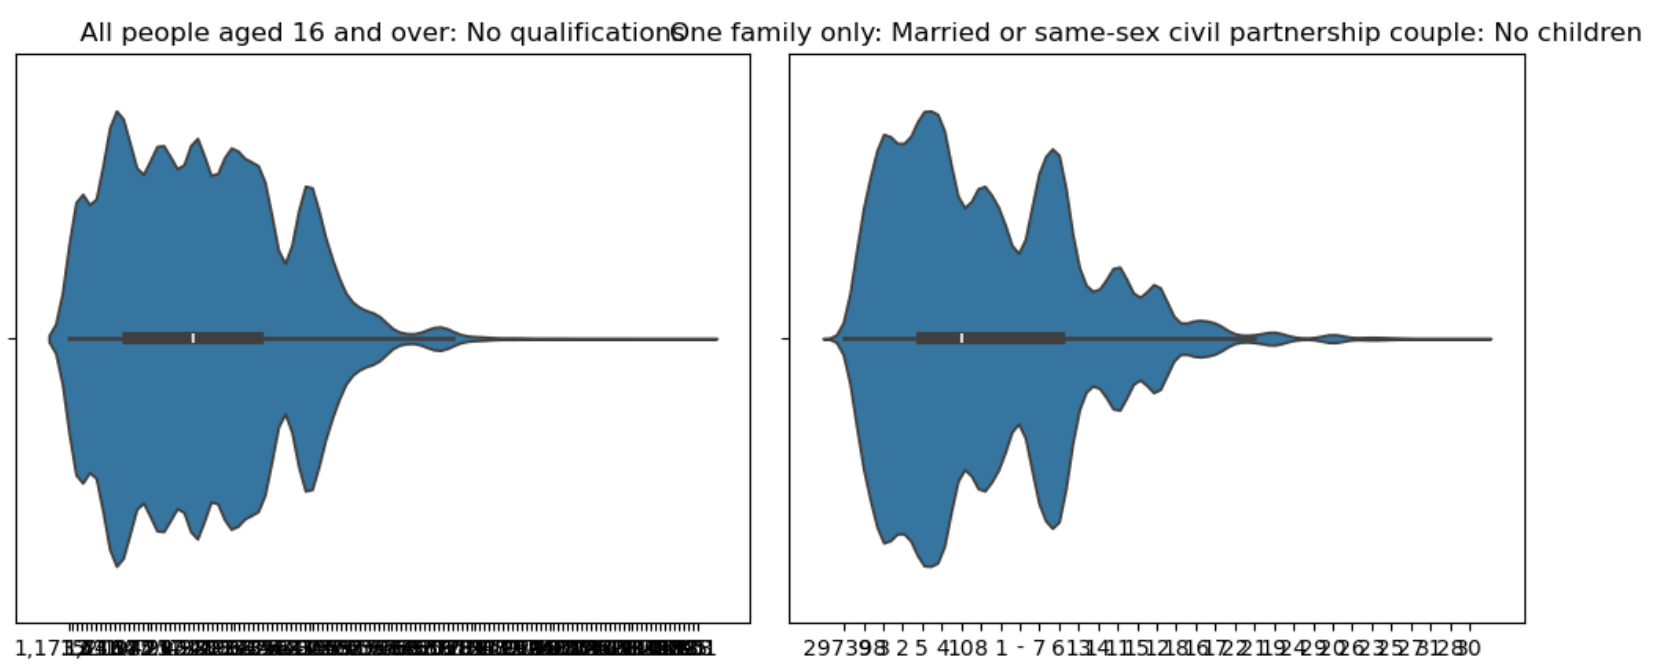

In [ ]:
# histograms 

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['20 to 24',
                      '75 to 84',
                      'Economically active: Employee: Full-time',
                      'Economically active: Unemployed',
                      'Very bad health',
                      'Very good health',
                      'All people aged 16 and over: No qualifications',
                      'One family only: Married or same-sex civil partnership couple: No children']

plt.figure(figsize=(10, 17))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

screenshots 

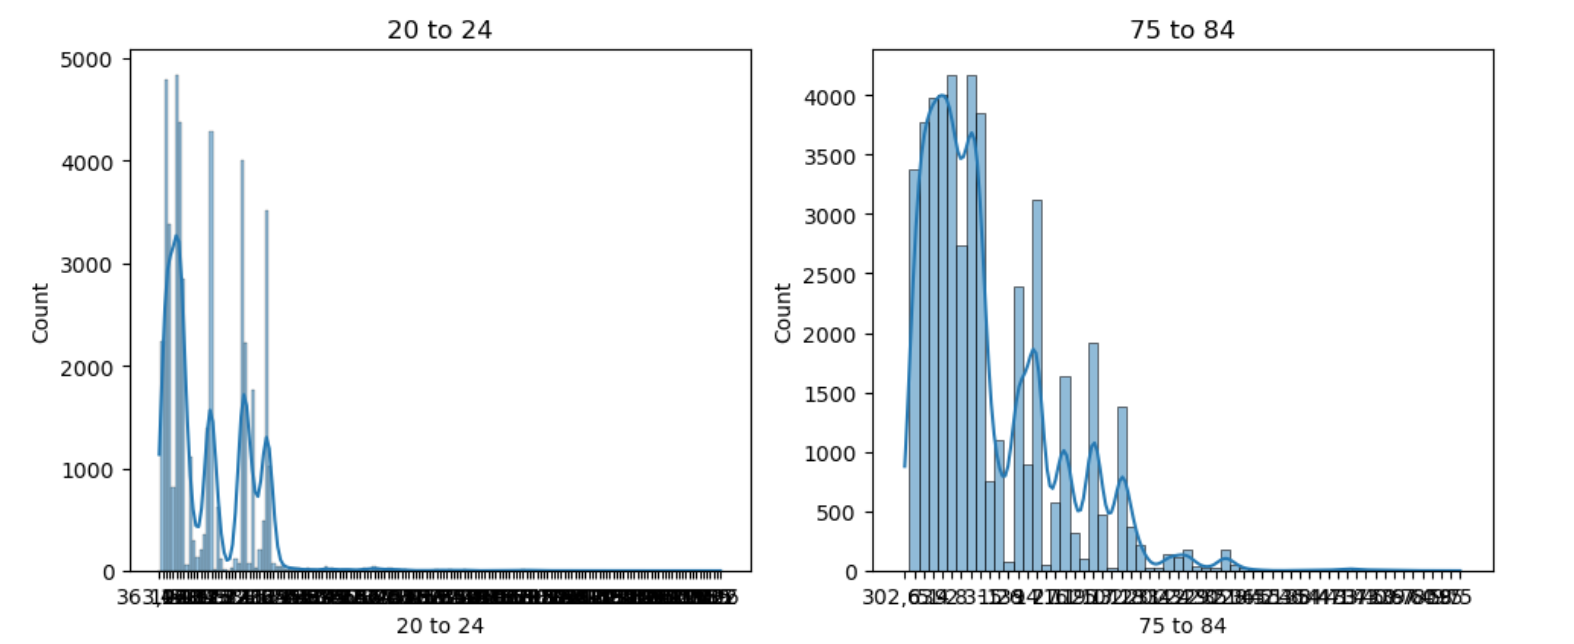
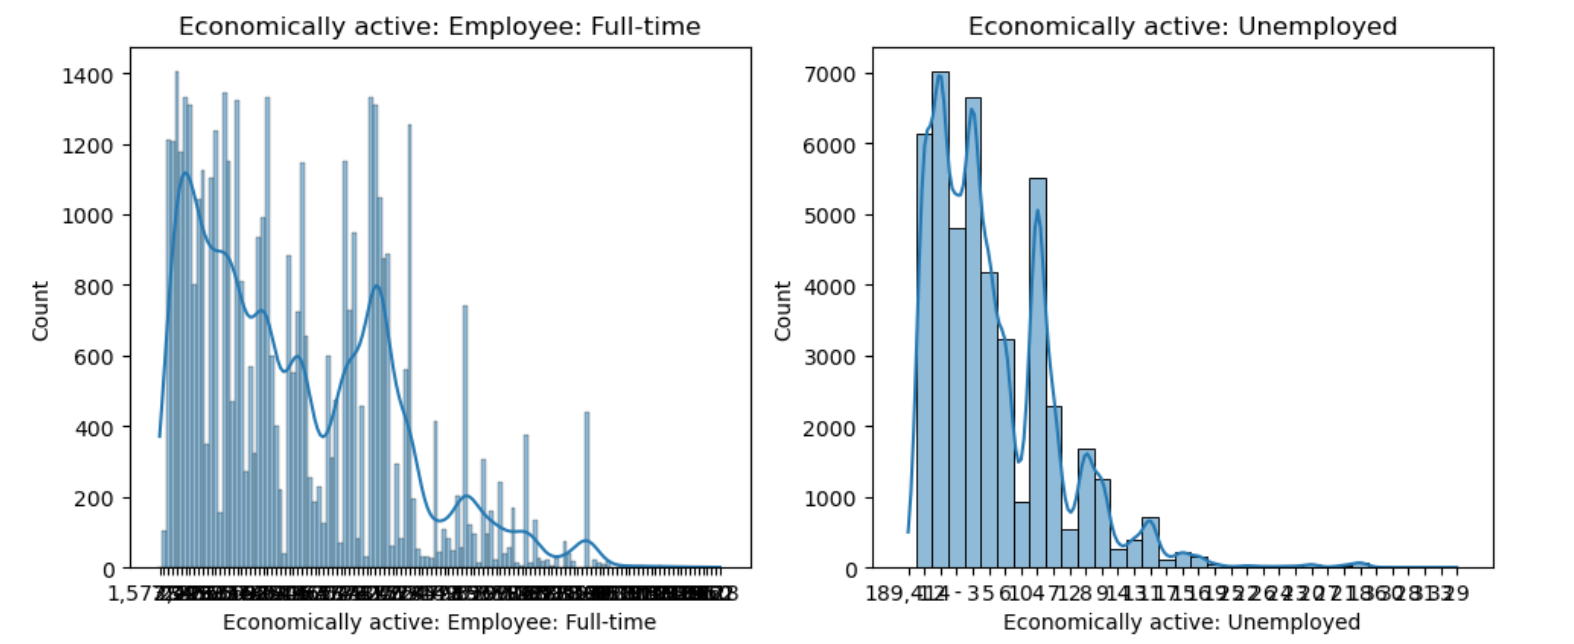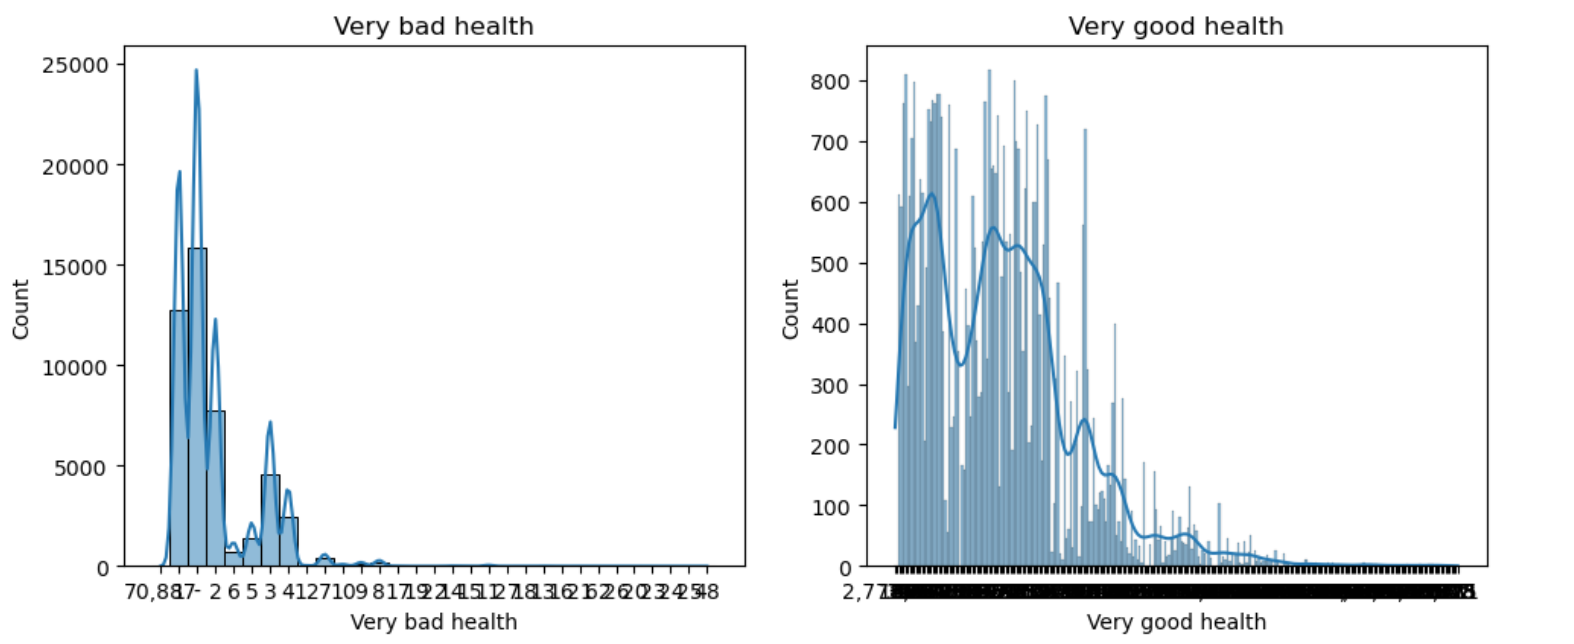
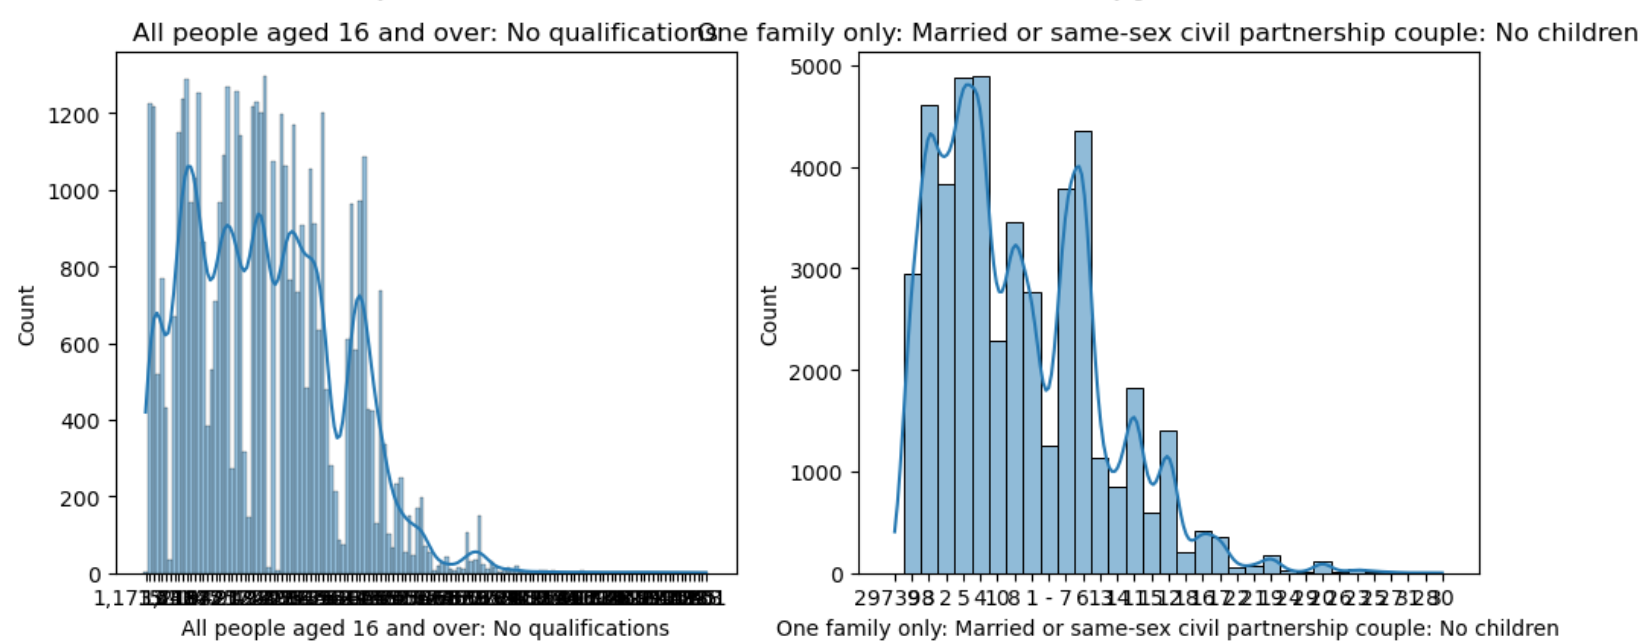



In [ ]:
def calculate_percentages(dataframe, total_columns, value_columns):
    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        
        # Force values to numeric (handle blanks or missing)
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df
    
# Totals for percentage calculation
total_cols = [
    'All people',                                 # 20 to 24
    'All people',                                 # 75 to 84
    'All people aged 16 to 74',                   # Full-time employees
    'All people aged 16 to 74',                   # Unemployed
    'All people',                                 # Very bad health
    'All people',                                 # Very good health
    'All people aged 16 and over',                # No qualifications
    'All households'                              # Household type: married, no kids
]

# Matching variables you want to convert to percentages
value_cols = [
    '20 to 24',
    '75 to 84',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Very bad health',
    'Very good health',
    'All people aged 16 and over: No qualifications',
    'One family only: Married or same-sex civil partnership couple: No children'
]

# Run the function
result_dataframe = calculate_percentages(edi_merg, total_cols, value_cols)




In [ ]:
result_dataframe.head()

In [ ]:
result_dataframe.shape

In [ ]:
concatenated_df = pd.concat([edi_merg, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

In [ ]:
concatenated_df.shape

In [ ]:
list(concatenated_df.columns)

In [ ]:
keep_cols= ['oa_code',
    'Popcount',
    'HHcount',
    'DataZone',
    'geometry',
    '20 to 24',
    '75 to 84',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Very bad health',
    'Very good health',
    'All people aged 16 and over: No qualifications',
    'One family only: Married or same-sex civil partnership couple: No children'
]

edi_census_data = concatenated_df[keep_cols]

In [ ]:
edi_census_data.head()

In [ ]:
# standarisation

numeric_columns = edi_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

screenshot

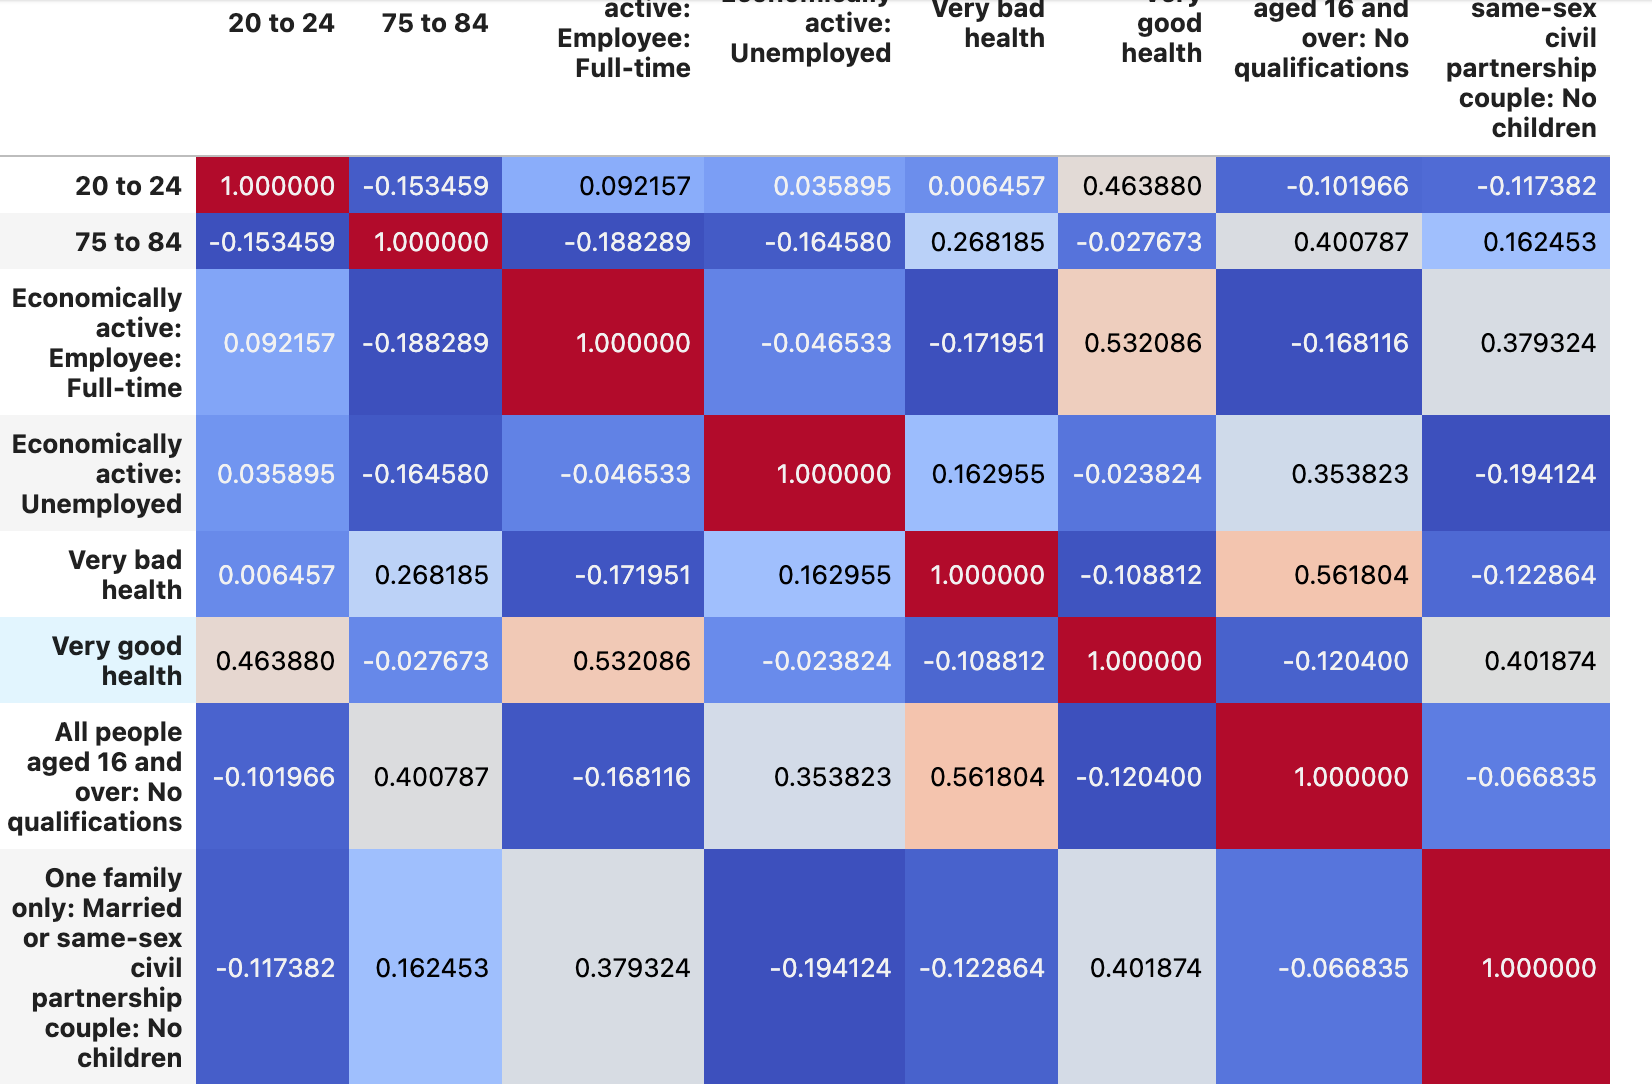

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

screenshot

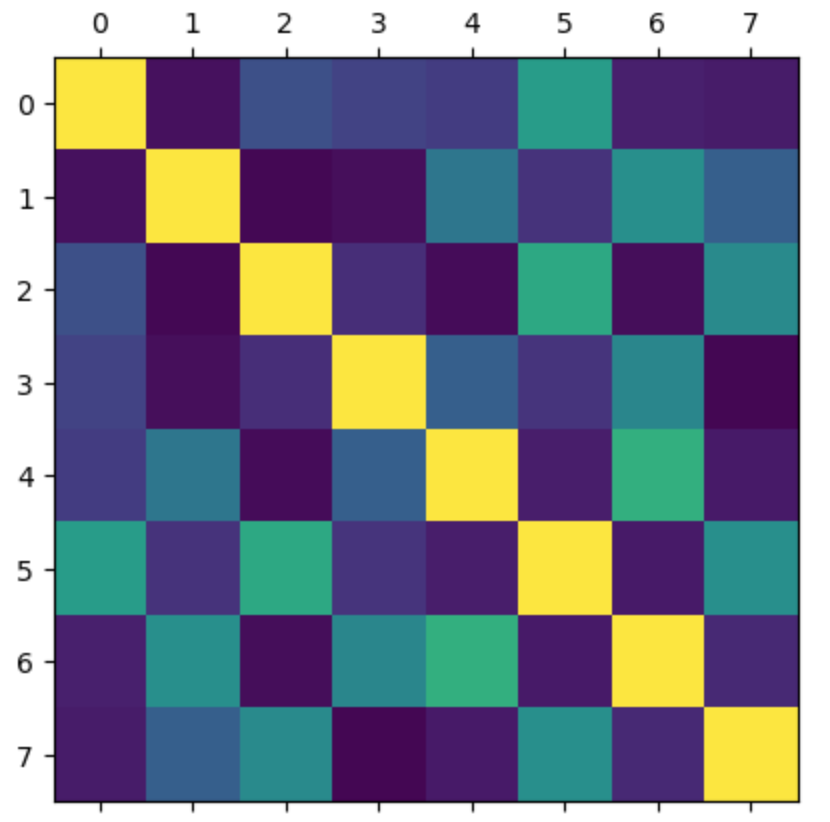

In [ ]:
threshold = 0.7 
highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# there are no highly correlated varaiables so therefore no data needs to be removed

screenshot

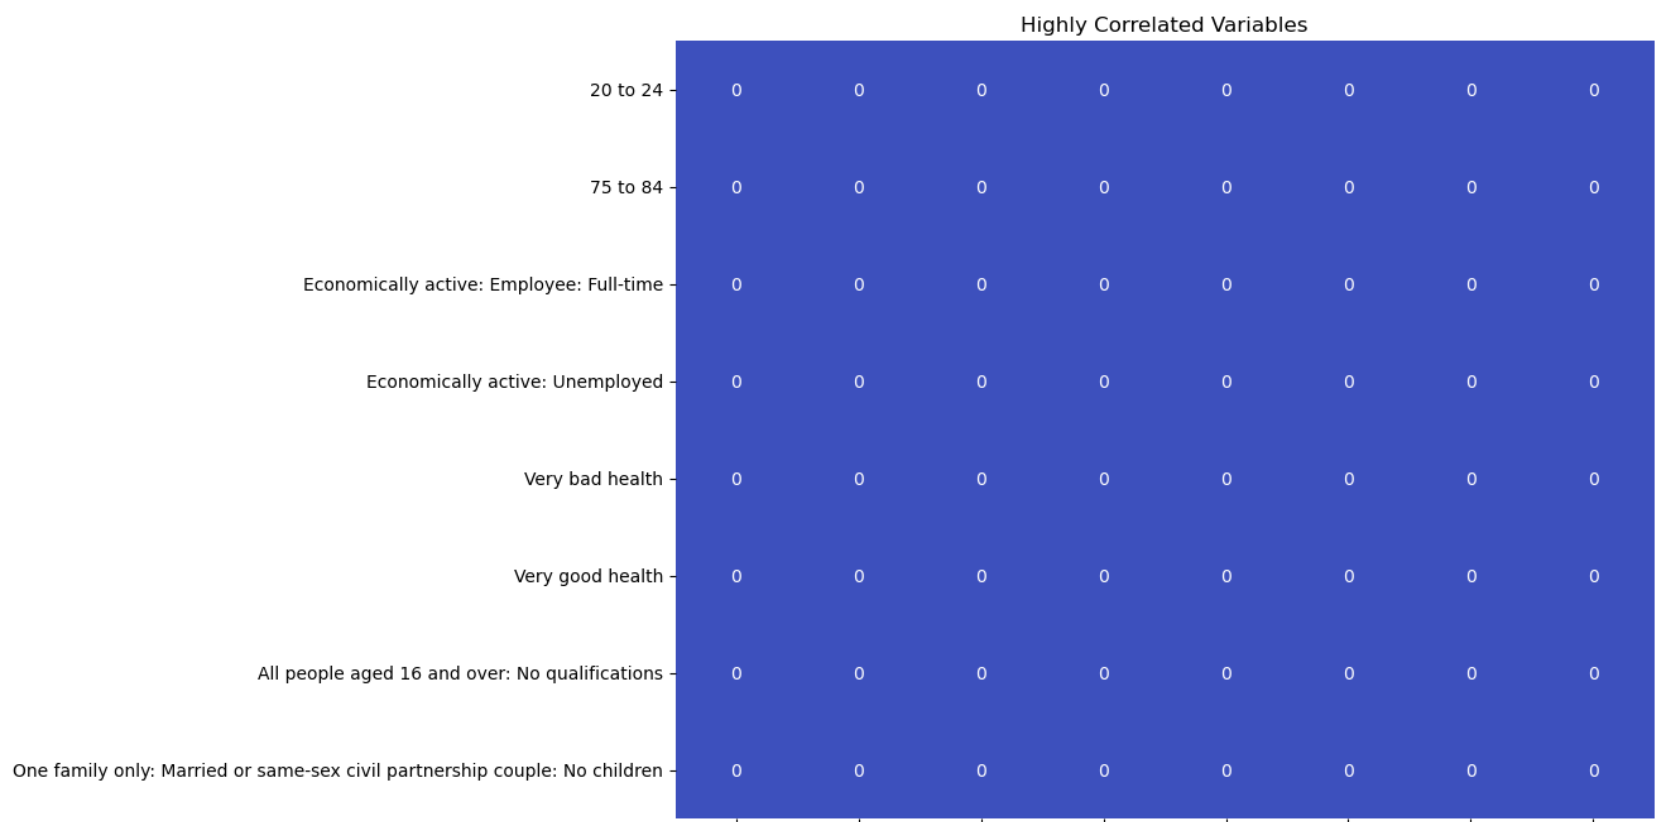

In [ ]:
# removing nan values 

z_score_df.isna().sum()

I have quite a few missing nan values so I think its best to impute the missing values then recalculate the z scores to avoid skewing the data too much. To do this i will use the median for this as there are so many missing values and this will help avoid skewd data.  

In [ ]:
numeric_columns = edi_census_data.select_dtypes(include='float64')
numeric_columns.fillna(z_score_df.median(), inplace=True)

In [ ]:
numeric_columns

In [ ]:
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

screenshot
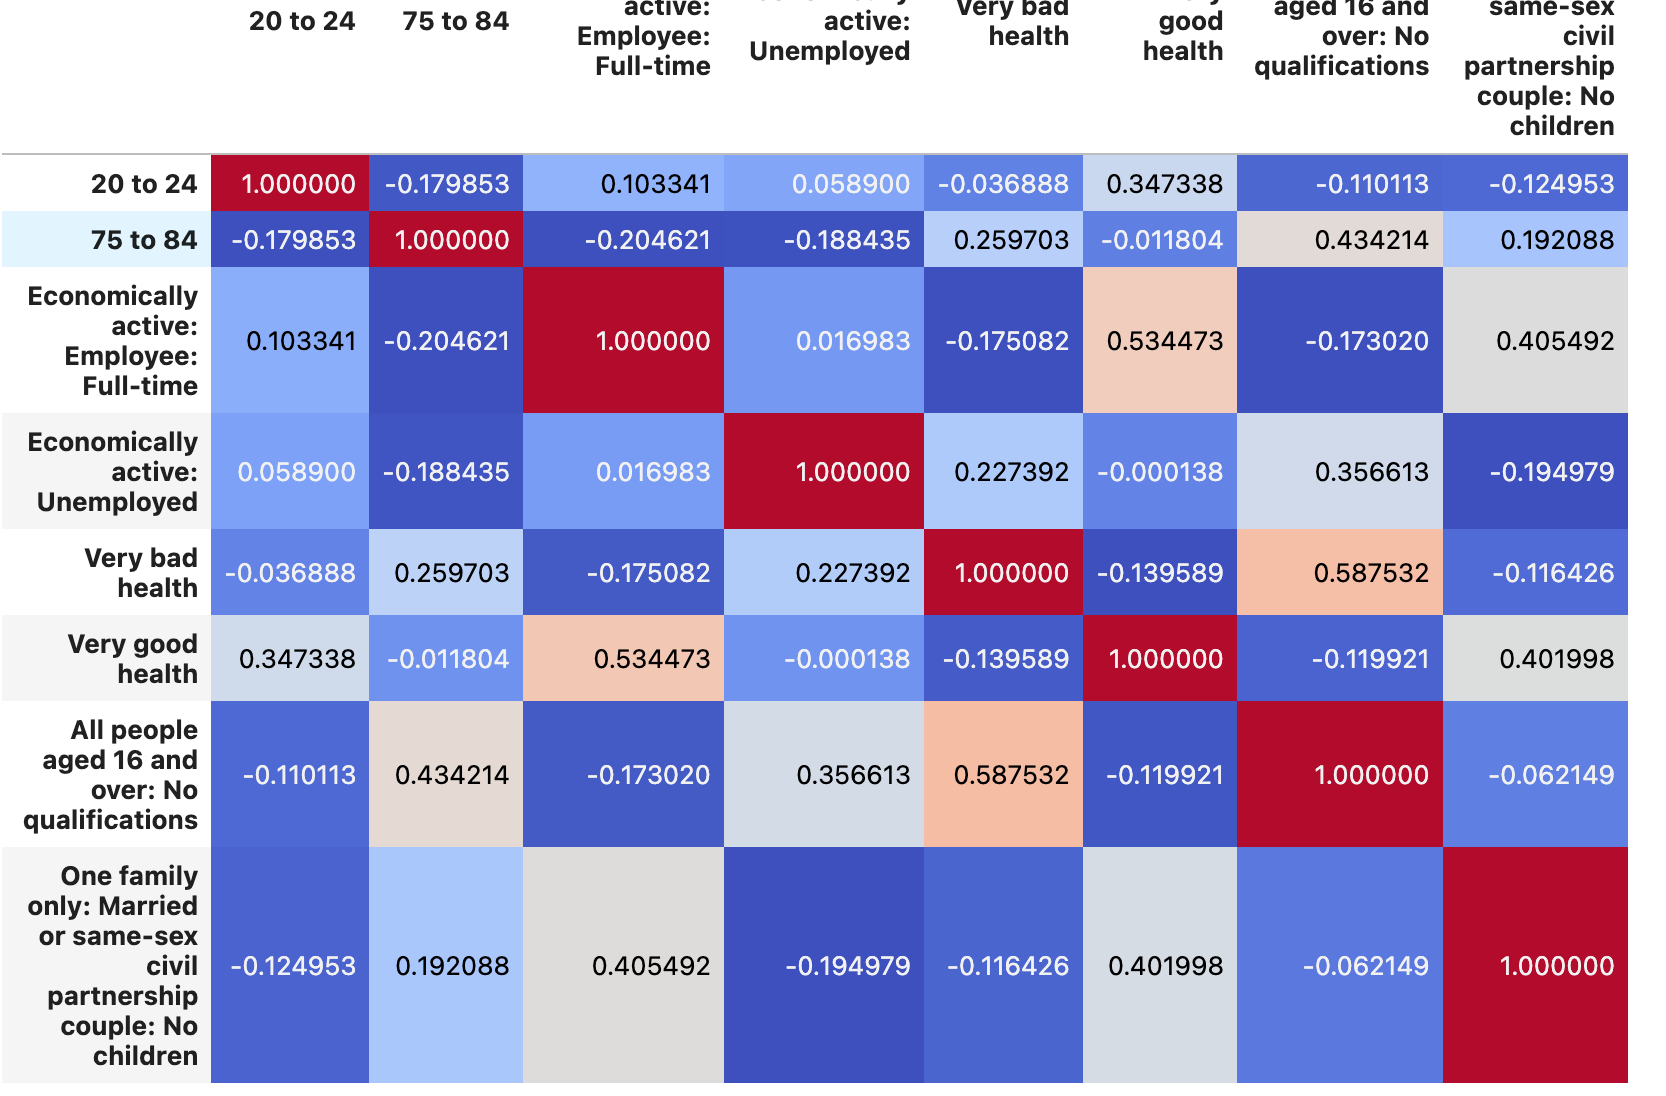

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

screenshot
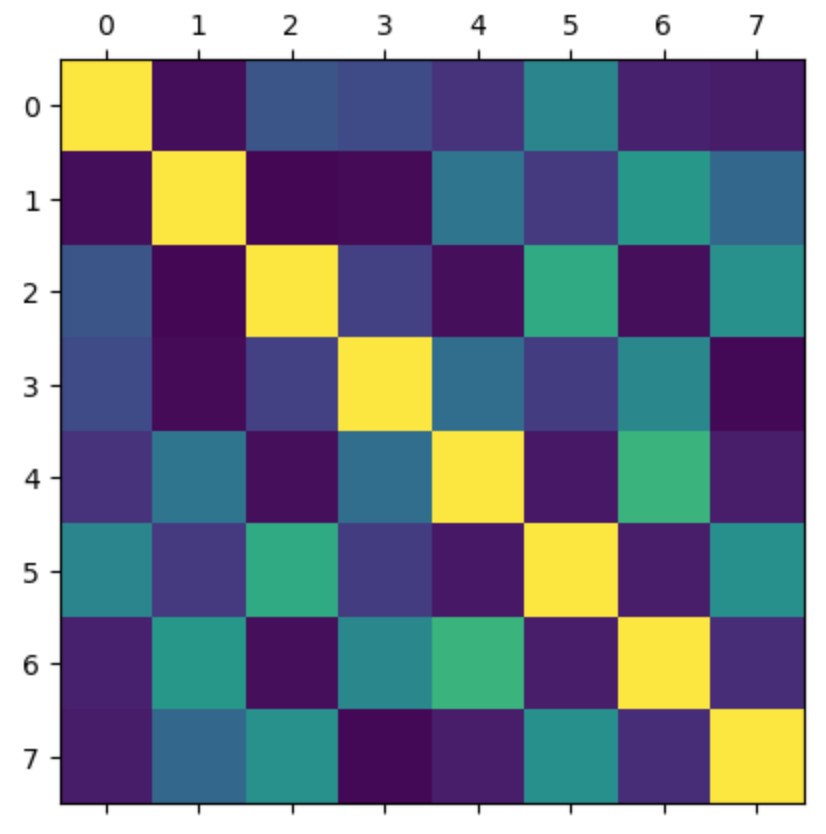

In [ ]:
threshold = 0.7 
highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# once again there are no highly correlated variables so nothing needs to be removed so can move on

screenshot
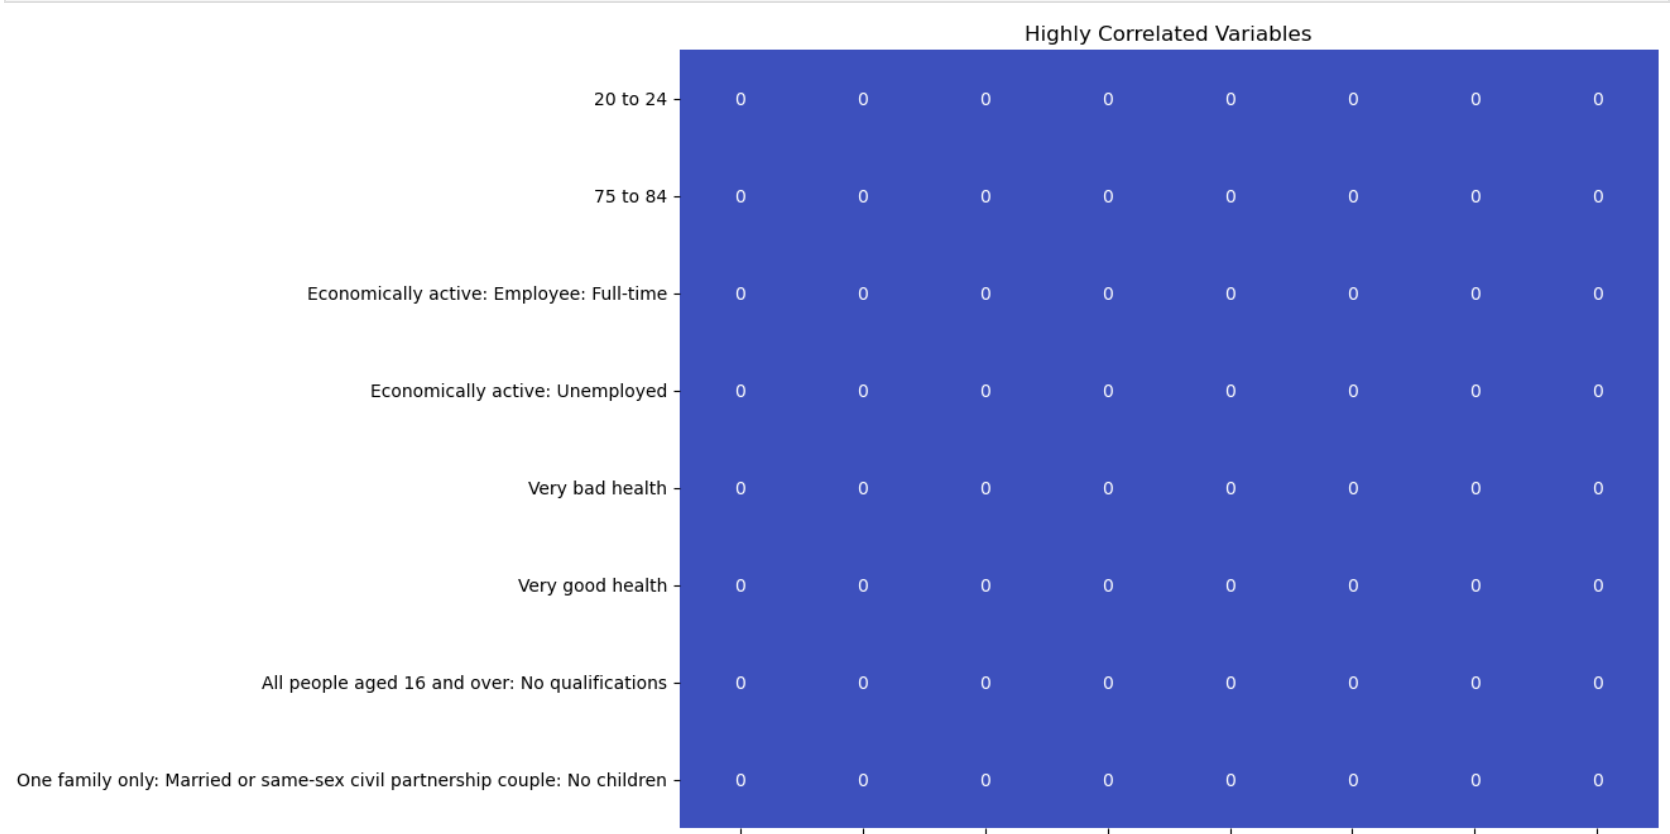

In [ ]:
# double checking there are no nan values 

contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("NaN values.")
else:
    print("no NaN values")

In [ ]:
# k clustering 
?KMeans

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# KMeans with 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

In [ ]:
plt.hist(labels)

In [ ]:
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

screenshot

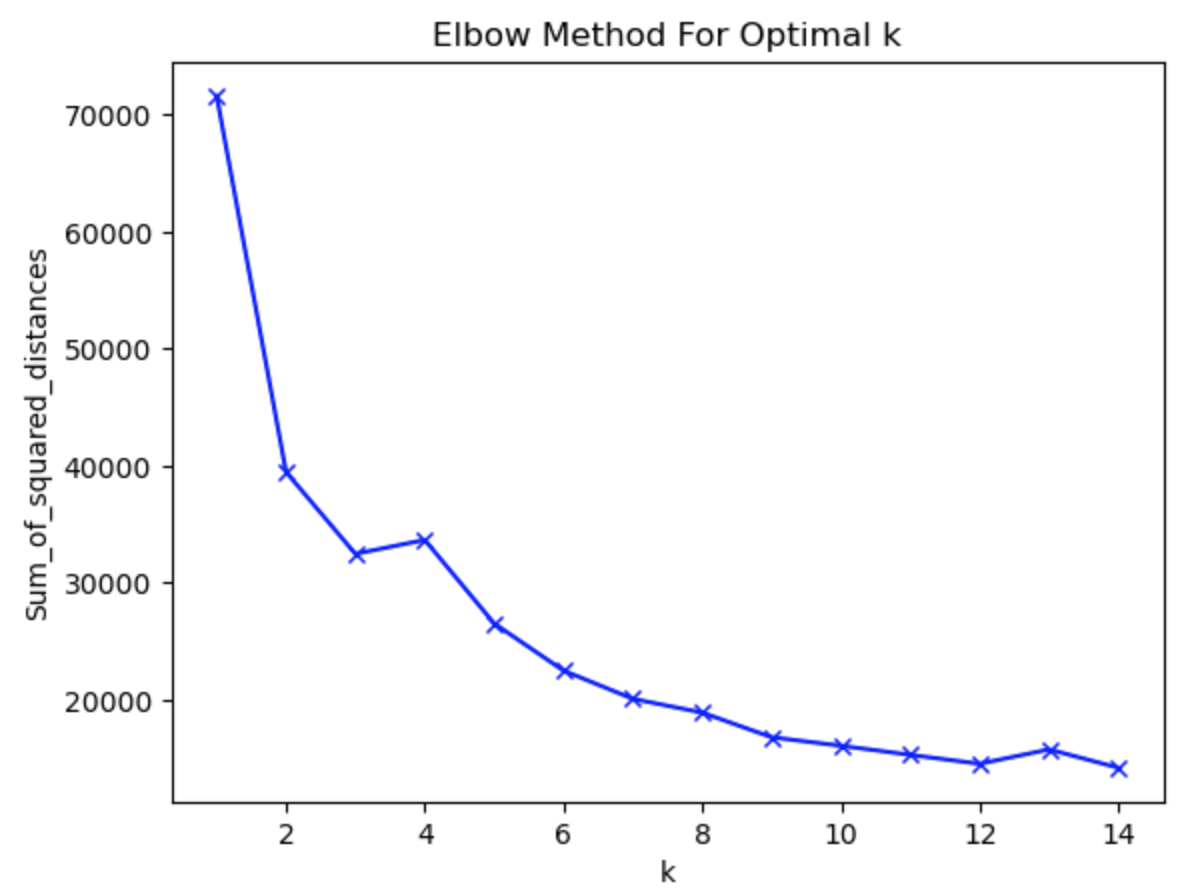

The elbow method suggests that a cluster group of 3, 4 or 5 would be suitable. I will confirm this with the BSS plot below

In [ ]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] 
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

screenshot
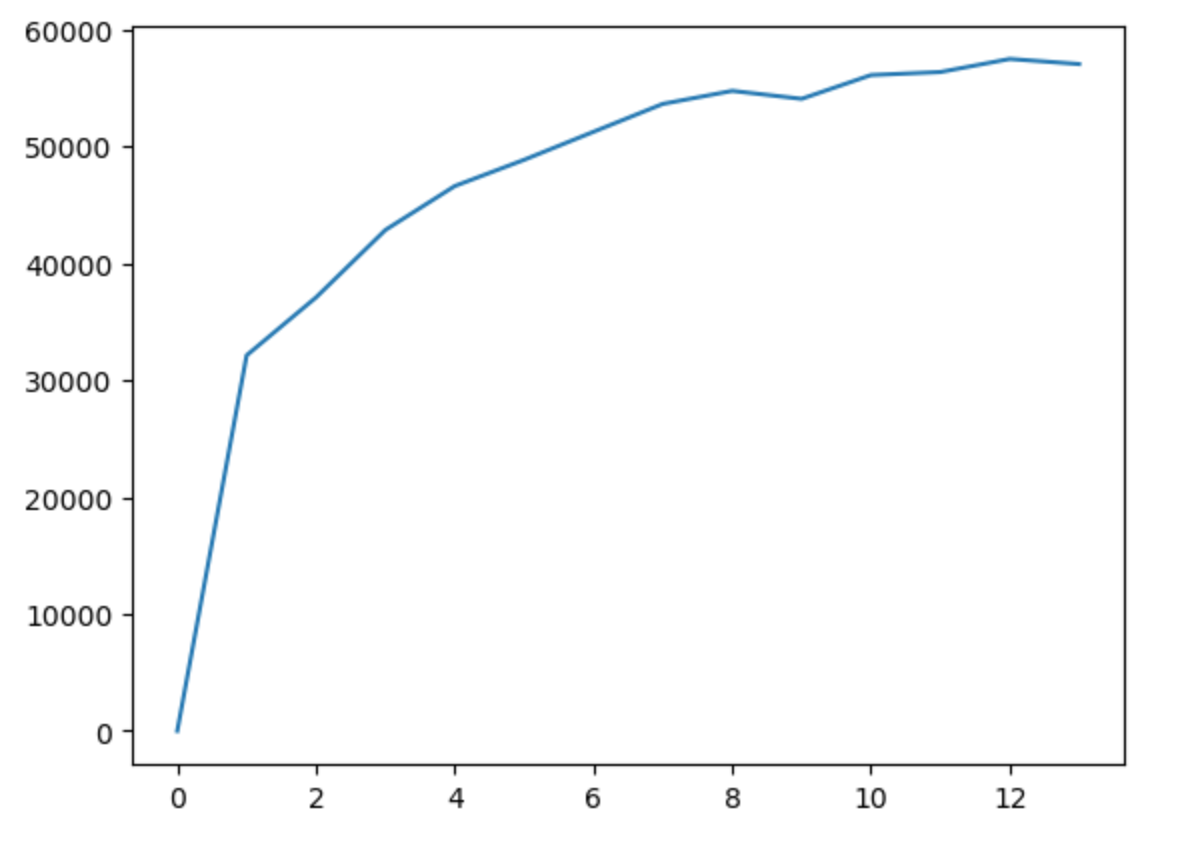

The BSS plot shows an optium of 4 or 5 cluster. Therefore, I will experient with all 3, 4, 5 cluster groups below in a PCA analysis. 

In [ ]:
### experimenting with three cluster groups

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")


In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df.drop(columns='Cluster')) 

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()


screenshots for 3 cluster groups

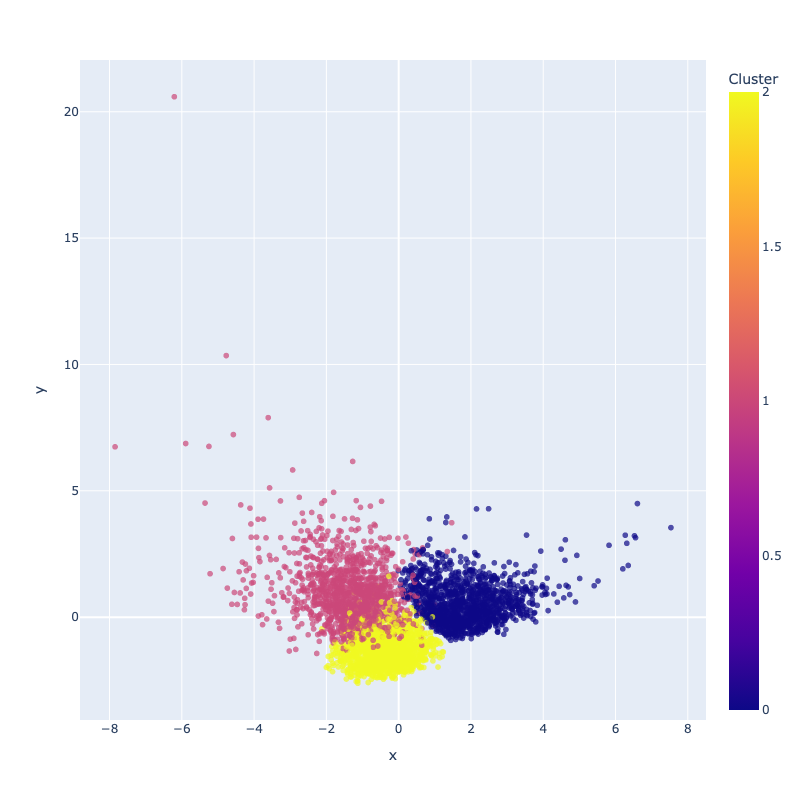
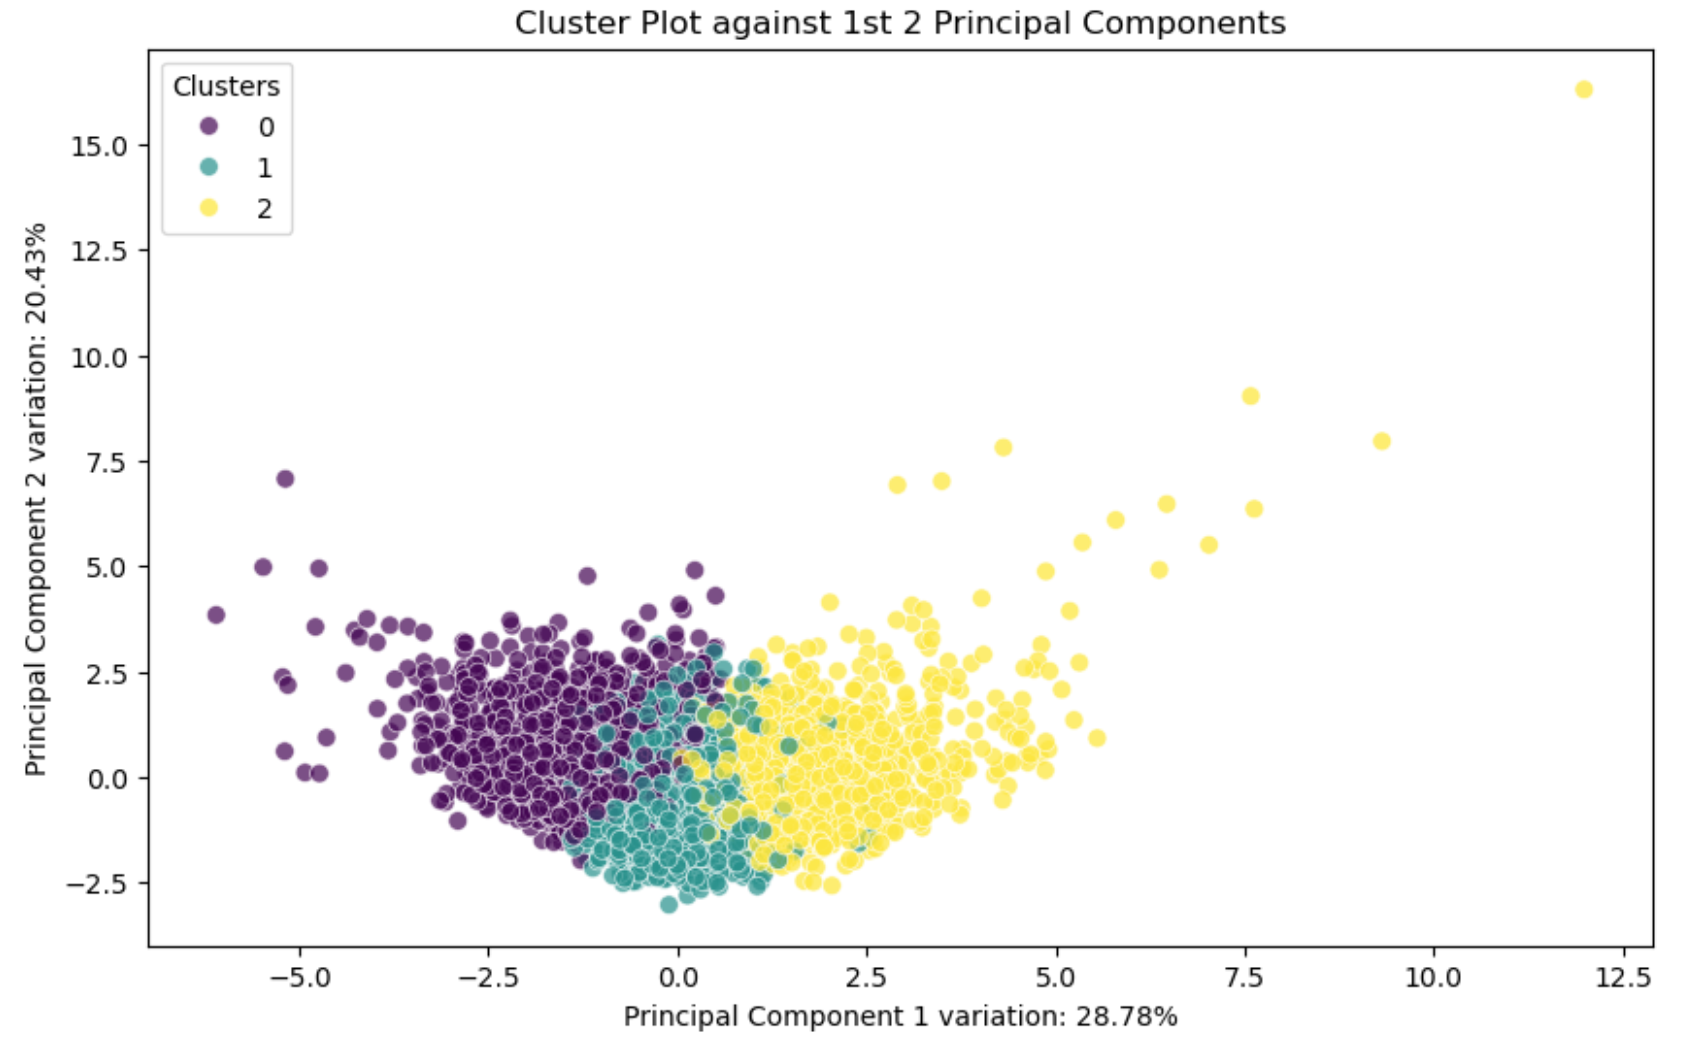

In [ ]:
### experimenting with 4 cluster groups 

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")



In [ ]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df.drop(columns='Cluster')) 

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()

screenshot for 4 cluster groups

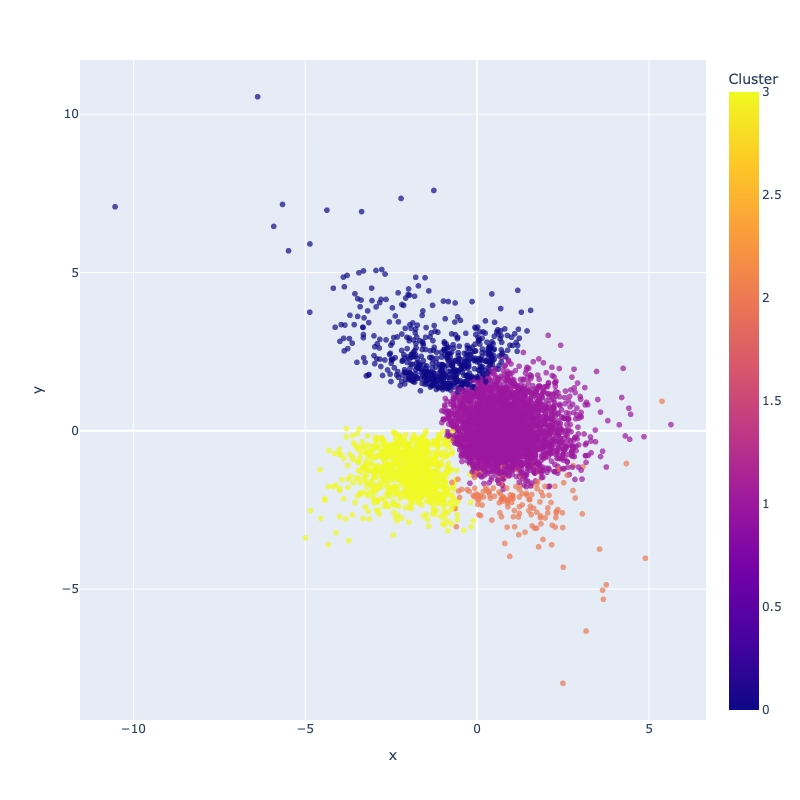
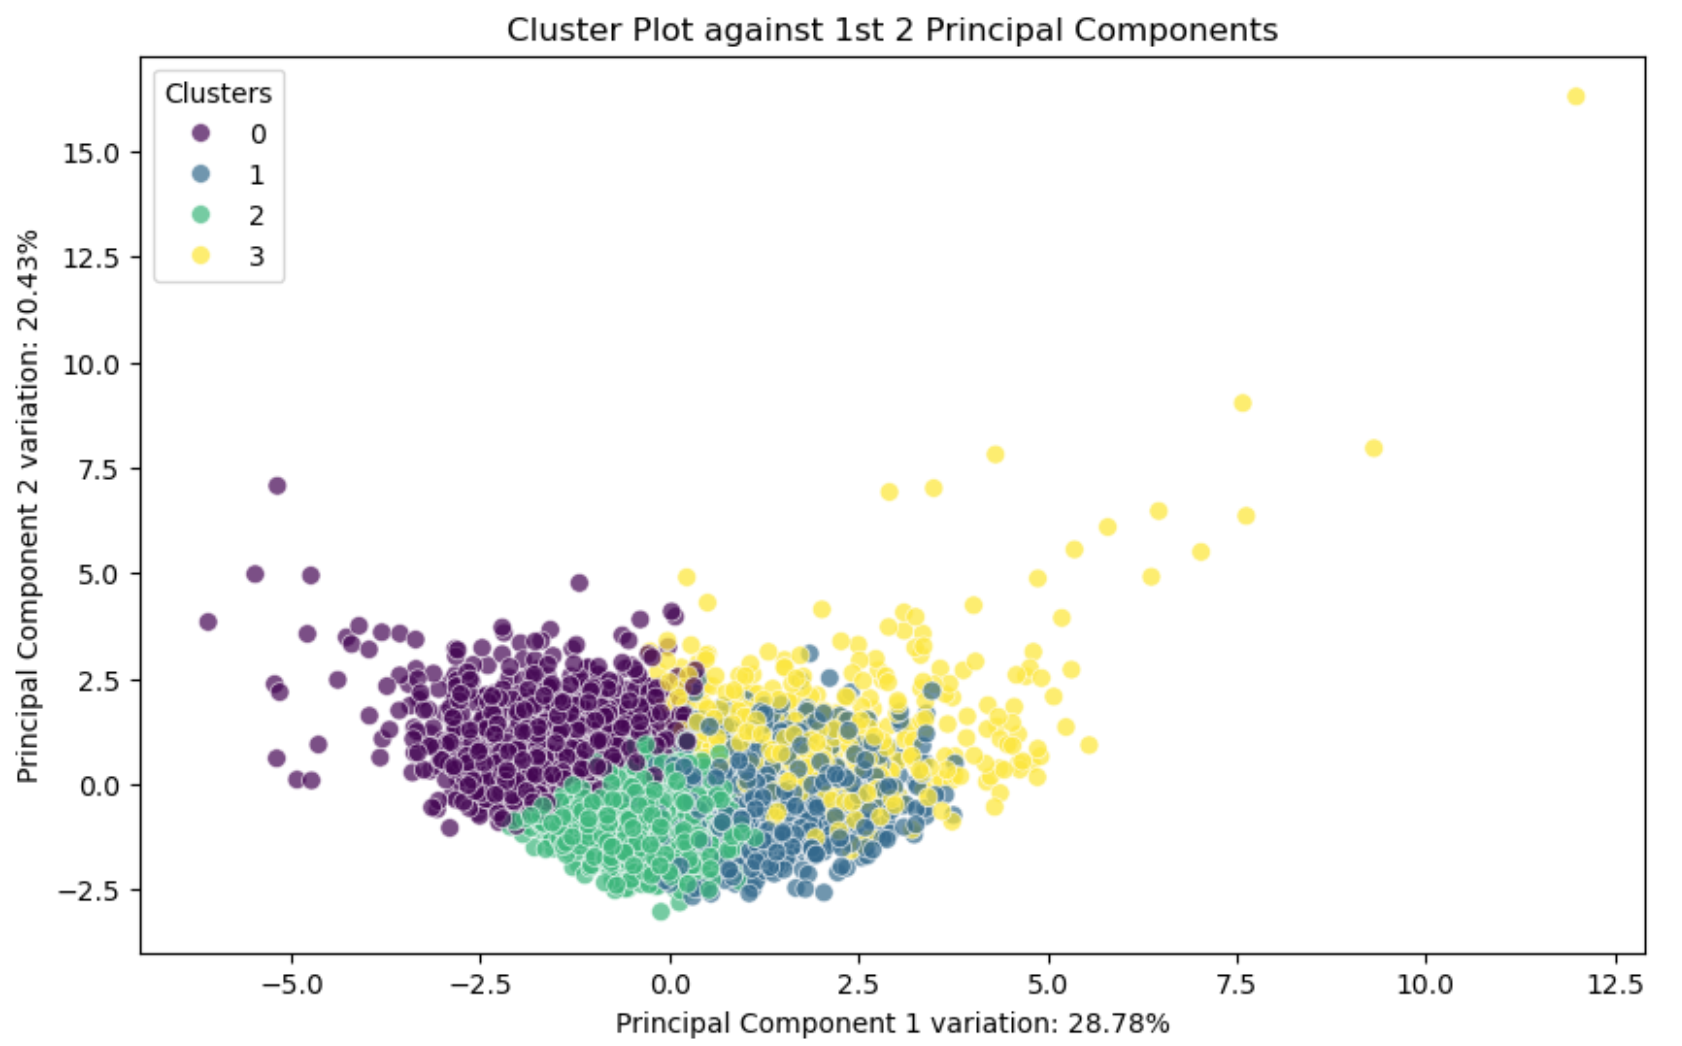

In [ ]:
### five cluster groups

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")



In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df.drop(columns='Cluster')) 

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()

screenshots for 5 cluster groups
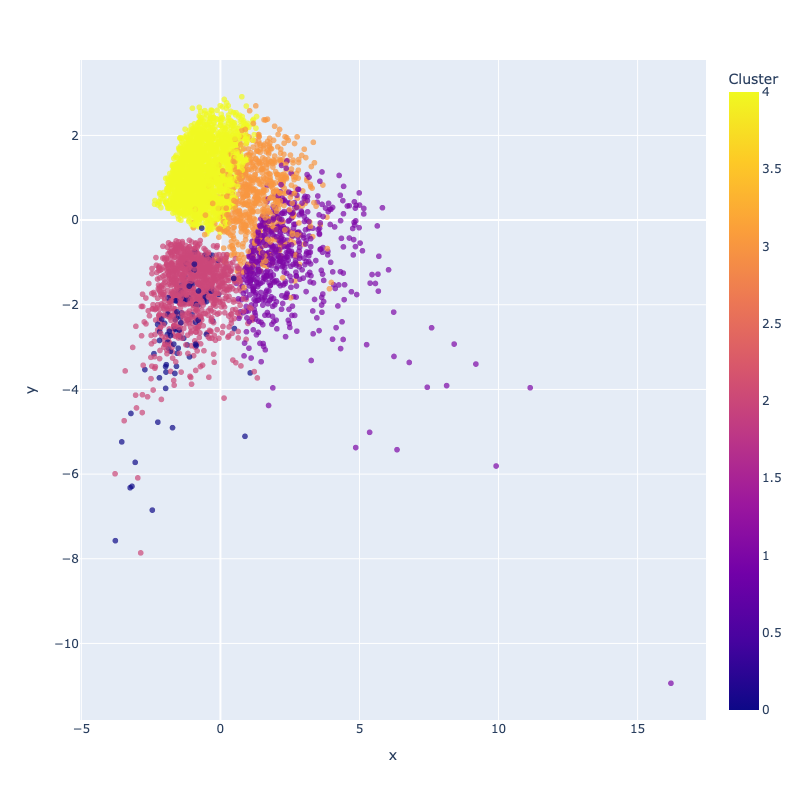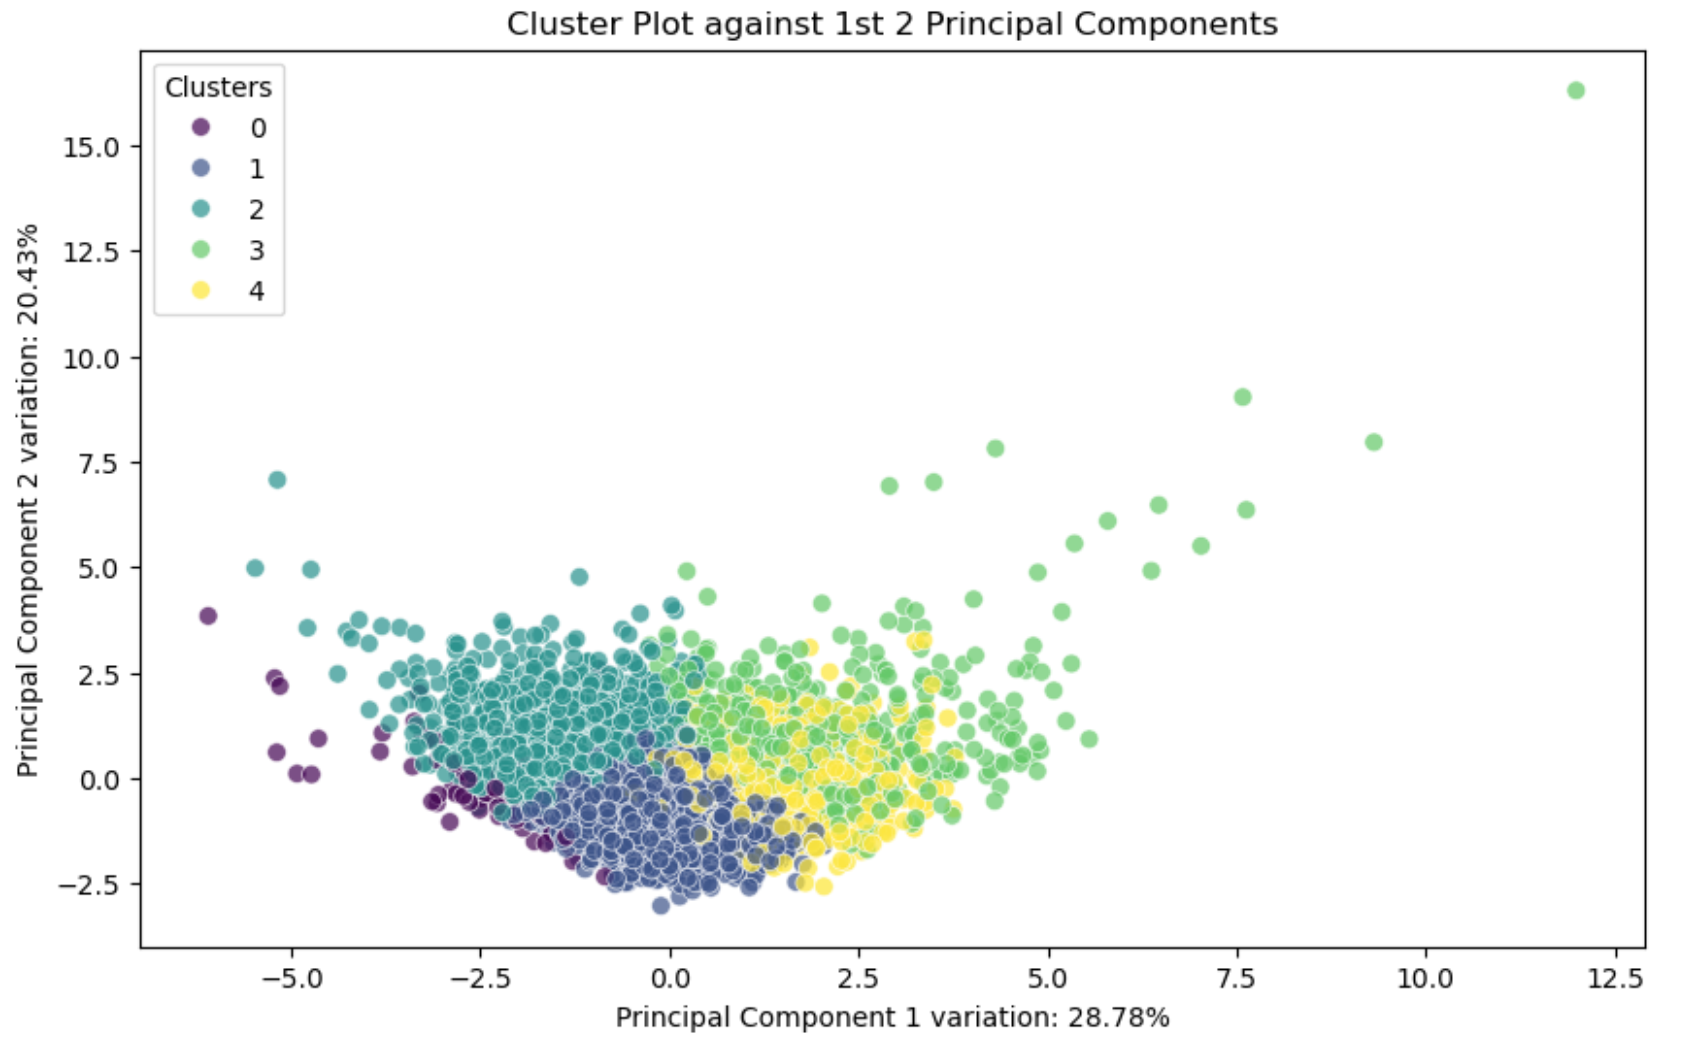


The PCA plots allowed for an effective assessment of how distinct and well-separated the cluster groups were in terms of the input variables. The PCA plots showed good separation between most of the five clusters, suggesting that the variables selected successfully captured variation in lifestyle and demographics across neighbourhoods. Each cluster highlights a unique demographic and lifestyle which can guide retailers in identifying areas best suited for specific types of services. For example, neighbourhoods dominated by younger, single-person households may respond well to cafés or gyms, while areas with higher unemployment or poor health may require different considerations for affordability and access. Thus, five cluster groups were selected for the final cluster map. 


In [ ]:
# creating final map

list(z_score_df.columns)

In [ ]:
z_score_df.drop(['20 to 24',
 '75 to 84',
 'Economically active: Employee: Full-time',
 'Economically active: Unemployed',
 'Very bad health',
 'Very good health',
 'All people aged 16 and over: No qualifications',
 'One family only: Married or same-sex civil partnership couple: No children'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
final_df = pd.concat([edi_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

screenshot of final map

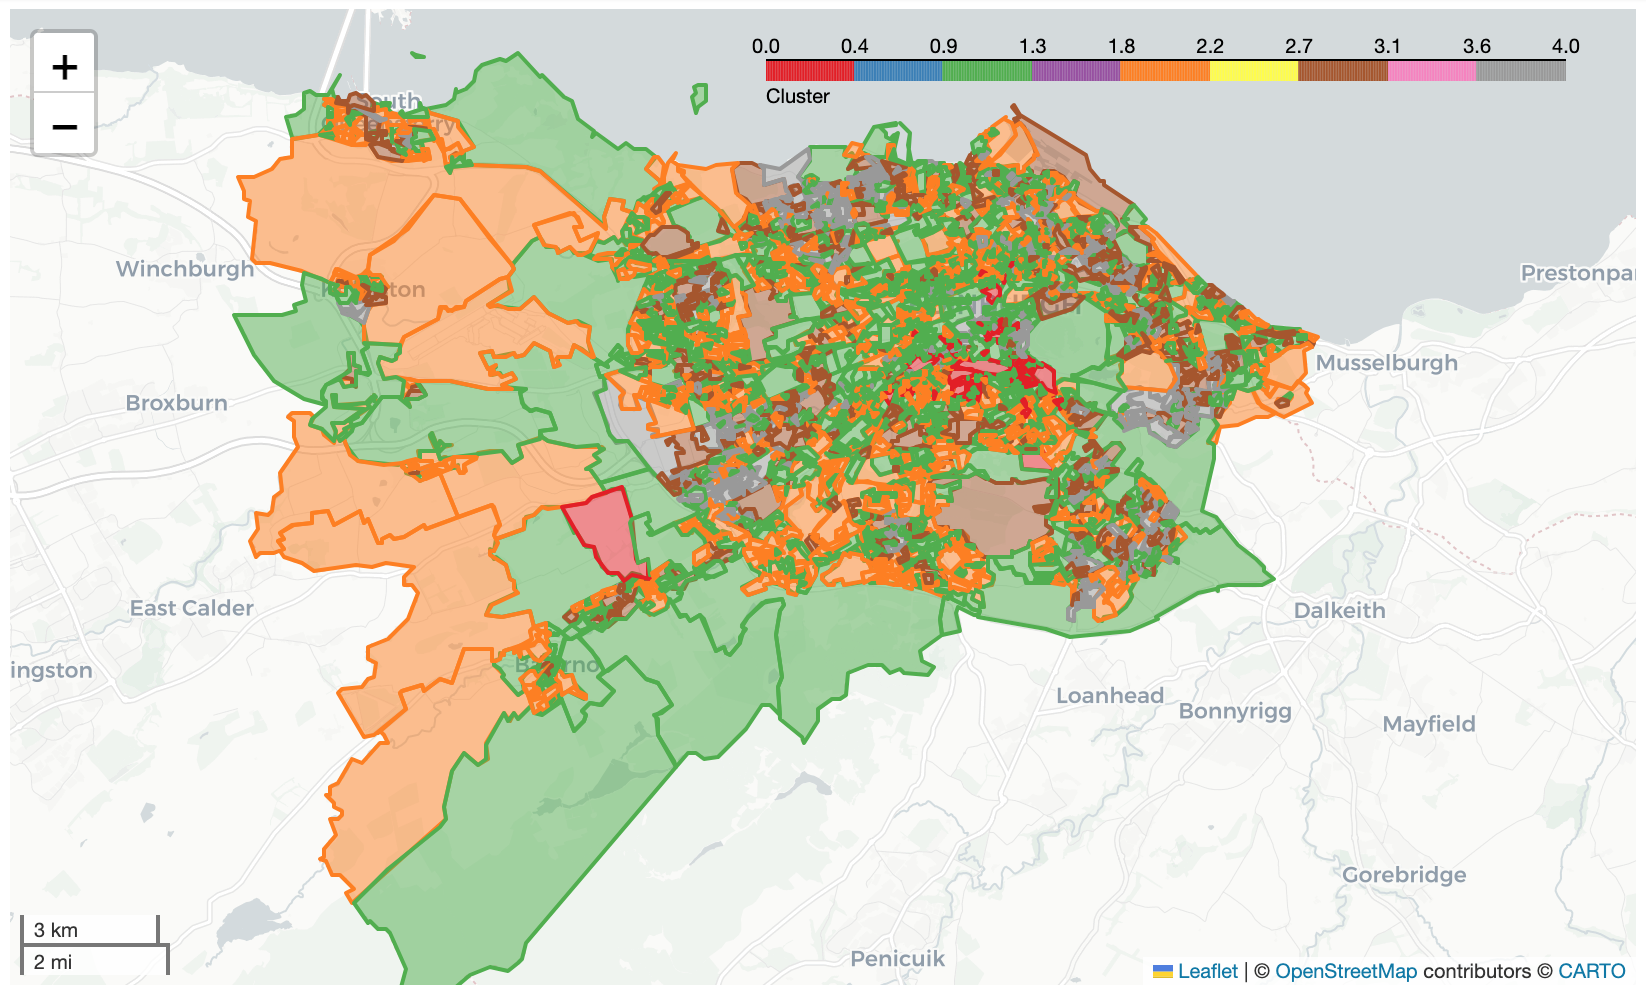

Although geodemographic classification is useful in providing insights to certain problems, it is inherently subjective. The final classification depends heavily on the selection of variables, preprocessing choices, and the number of clusters defined. The elbow method was used to identify five clusters as an optimal number of cluster groups. However, this decision was supported by visual inspection of PCA results and a qualitative assessment of how meaningful and interpretable each cluster appeared in relation to the other groups. Throughout the process, a number of challenges emerged. These included dealing with missing or inconsistent data and choosing relevant variables. The decision was made to fill missing number before standarisation to avoid skewwing data too much. In addition, there were limited variables used in this example and the map could be improved by including significantly more variables. For example, by incorporating a broader range of variables, such as, more income levels, the housing tenure of individuals, access to services, or more detailed age categories. This will help capture a more nuanced understanding of the population and their consumer behaviours.

This classification can support retail businesses in identifying areas most suited to specific types of stores or services. For example, areas with younger populations and higher proportions of single households may be ideal for cafés or fitness studios, while family dense or more affluent areas may benefit more from supermarkets or larger retail outlets. Beyond retail, the classification could also inform local government and urban planners in delivering targeted services or improving accessibility.

Referances:

Scikit-learn. (n.d.). K-means clustering. Available at: https://scikit-learn.org/stable/modules/clustering.html#k-means(Accessed 1 April 2025).

SciPy. (2024). scipy.spatial.distance.cdist — SciPy v1.15.2 Manual. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html (Accessed 2 April 2025).

SciPy Community. (2024). scipy.spatial.distance.pdist — SciPy v1.15.2 Manual. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html (Accessed 2 April 2025).

National Records of Scotland. (2024). 2011 Census boundaries. Available at: https://webarchive.nrscotland.gov.uk/20241128123116/https://www.nrscotland.gov.uk/statistics-and-data/geography/our-products/census-datasets/2011-census/2011-boundaries (Accessed 1 April 2025).

Scotland's National Statistics. (n.d.). City of Edinburgh (S12000036). Available at: https://statistics.gov.scot/atlas/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fid%2Fstatistical-geography%2FS12000036 (Accessed 1 April 2025).

VanderPlas, J. (n.d.). In Depth: k-Means Clustering. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html (Accessed 2 April 2025).

Waskom, M. (2024). An introduction to seaborn. Available at: https://seaborn.pydata.org/tutorial/introduction.html (Accessed 1 April 2025).

Waskom, M. (2024). seaborn.violinplot — seaborn 0.13.2 documentation. Available at: https://seaborn.pydata.org/generated/seaborn.violinplot.html (Accessed 1 April 2025).
